In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def m_alpha(V):
    return -0.1*(V+23)/(np.exp(-0.1*(V+23))-1)
def m_beta(V):
    return 4*np.exp(-(V+48)/18)
def minf(V):     
    alpha = m_alpha(V)
    beta = m_beta(V)
    return alpha / (alpha + beta)
def taum(V):
    return 1/(m_alpha(V)+m_beta(V))

def h_alpha(V):
    return 0.07 * np.exp(-(V+37)/20)
def h_beta(V):
    return 1/(np.exp(-0.1*(V+7))+1)
def hinf(V):     
    alpha = h_alpha(V)
    beta = h_beta(V)
    return alpha / (alpha + beta)
def tauh(V):
    return 1/(h_alpha(V)+h_beta(V))

def n_alpha(V):
    return -0.01*(V+27)/(np.exp(-0.1*(V+27))-1)
def n_beta(V):
    return 0.125*np.exp(-(V+37)/80)
def ninf(V):     
    alpha = n_alpha(V)
    beta = n_beta(V)
    return alpha / (alpha + beta)
def taun(V):
    return 1/(n_alpha(V)+n_beta(V))

def p_alpha(V):
    return 1/(0.15*(1+np.exp(-(V+38)/6.5)))
def p_beta(V):
    return np.exp(-(V+38)/6.5)/(0.15*(1+np.exp(-(V+38)/6.5)))
def pinf(V):     
    alpha = p_alpha(V)
    beta = p_beta(V)
    return alpha / (alpha + beta)
def taup(V):
    return 1/(p_alpha(V)+p_beta(V))

def rfinf(V):
    return 1 / (1+np.exp((V+79.2)/9.78))
def taurf(V):
    return 0.51 / (np.exp((V-1.7)/10)+np.exp(-(V+340)/52))+1

def rsinf(V):
    return 1 / (1+np.exp((V+2.83)/15.9))**58
def taurs(V):
    return 5.6/(np.exp((V-1.7)/14)+np.exp(-(V+260)/43))+1

# Define the membrane potential range
V = np.linspace(-100, 50, 500)


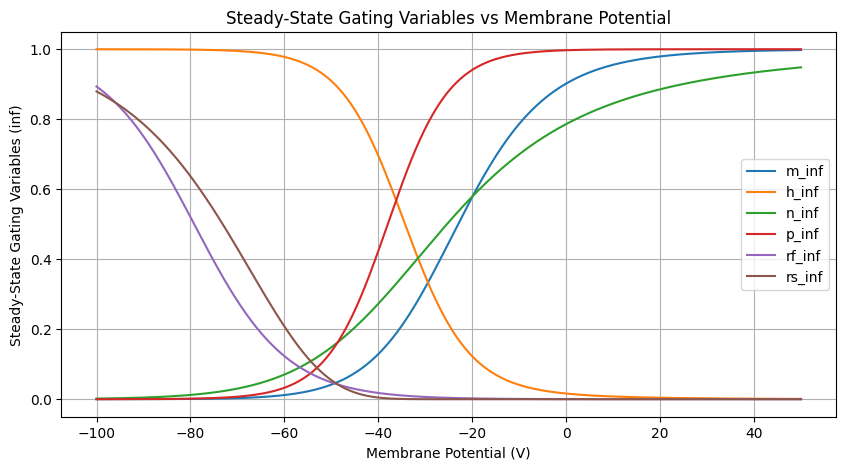

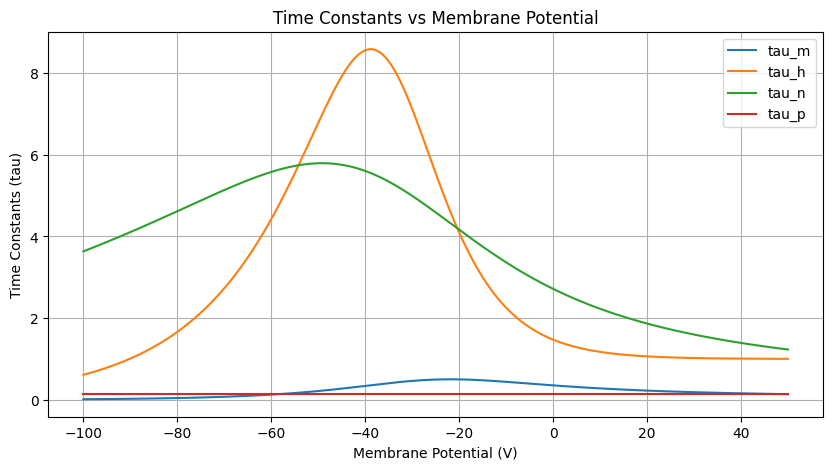

In [5]:
# Calculate all the steady-state (inf) and time constant (tau) functions
minf_vals = minf(V)
hinf_vals = hinf(V)
ninf_vals = ninf(V)
pinf_vals = pinf(V)
rfinf_vals = rfinf(V)
rsinf_vals = rsinf(V)

taum_vals = taum(V)
tauh_vals = tauh(V)
taun_vals = taun(V)
taup_vals = taup(V)
taurf_vals = taurf(V)
taurs_vals = taurs(V)

# Plot all the inf values on one graph
plt.figure(figsize=(10, 5))
plt.plot(V, minf_vals, label="m_inf")
plt.plot(V, hinf_vals, label="h_inf")
plt.plot(V, ninf_vals, label="n_inf")
plt.plot(V, pinf_vals, label="p_inf")
plt.plot(V, rfinf_vals, label="rf_inf")
plt.plot(V, rsinf_vals, label="rs_inf")

plt.xlabel("Membrane Potential (V)")
plt.ylabel("Steady-State Gating Variables (inf)")
plt.title("Steady-State Gating Variables vs Membrane Potential")
plt.legend()
plt.grid(True)

# Plot all the tau values on another graph
plt.figure(figsize=(10, 5))
plt.plot(V, taum_vals, label="tau_m")
plt.plot(V, tauh_vals, label="tau_h")
plt.plot(V, taun_vals, label="tau_n")
plt.plot(V, taup_vals, label="tau_p")
#plt.plot(V, taurf_vals, label="tau_rf")
#plt.plot(V, taurs_vals, label="tau_rs")

plt.xlabel("Membrane Potential (V)")
plt.ylabel("Time Constants (tau)")
plt.title("Time Constants vs Membrane Potential")
plt.legend()
plt.grid(True)

# Show the plots
plt.show()

In [6]:
def simulator_HH():

    Gk = 11
    Ek = -90
    Gl = 0.5
    El = -65
    Gh = 1.5
    Eh = -20 #32.9
    Gna = 52
    Ena = 55
    Gp = 0.5
    dt = 0.01
    t = np.arange(0,1000,.01)
    V = np.zeros(len(t))
    h = np.zeros(len(t))
    H = np.zeros(len(t))
    m = np.zeros(len(t))
    n = np.zeros(len(t))
    rf = np.zeros(len(t))
    rs = np.zeros(len(t))
    p = np.zeros(len(t))

    I = np.zeros(len(t))

    I = -2.51

    V[0] = -70
    for j in range(len(t)-1):
        k1V = -Gl * (V[j] - El) -Gna*(m[j]**3)*h[j]*(V[j]-Ena) - Gk * n[j]**4 * (V[j] - Ek) - Gp * p[j] * (V[j] - Ena) - Gh * (0.65*rf[j]+0.35*rs[j]) * (V[j]-Eh) + I
        

        k1h = (hinf(V[j]) - h[j]) / tauh(V[j])
        k1m = (minf(V[j]) - m[j]) / taum(V[j])
        k1n = (ninf(V[j]) - n[j]) / taun(V[j])
        k1p = (pinf(V[j]) - p[j]) / taup(V[j])
        k1rf = (rfinf(V[j]) - rf[j]) / taurf(V[j])
        k1rs = (rsinf(V[j]) - rs[j]) / taurs(V[j])
        

        am = m[j] + k1m * dt
        ap = p[j] + k1p * dt
        an = n[j] + k1n * dt
        av = V[j] + k1V * dt
        ah = h[j] + k1h * dt
        arf = rf[j] + k1rf * dt
        ars = rs[j] + k1rs * dt
        

        k2V = -Gl * (av - El)  -Gna*(am**3)*ah*(av-Ena) - Gk * an**4 * (av - Ek) - Gp * ap * (av - Ena) - Gh * (0.65*arf+0.35*ars) * (av-Eh) + I
        

        k2h = (hinf(av) - ah) / tauh(av)
        k2m = (minf(av) - am) / taum(av)
        k2n = (ninf(av) - an) / taun(av)
        k2p = (pinf(av) - ap) / taup(av)
        k2rf = (rfinf(av) - arf) / taurf(av)
        k2rs = (rsinf(av) - ars) / taurs(av)

        n[j + 1] = n[j] + (k1n + k2n) * dt / 2
        m[j + 1] = m[j] + (k1m + k2m) * dt / 2
        p[j + 1] = p[j] + (k1p + k2p) * dt / 2
        rf[j + 1] = rf[j] + (k1rf + k2rf) * dt / 2
        rs[j + 1] = rs[j] + (k1rs + k2rs) * dt / 2

        V[j+1] = V[j] + (k1V + k2V) * dt / 2
        h[j+1] = h[j] + (k1h + k2h) * dt / 2
   

    return np.array(V).reshape(-1,1),np.array(rs).reshape(-1,1),np.array(I).reshape(-1,1)

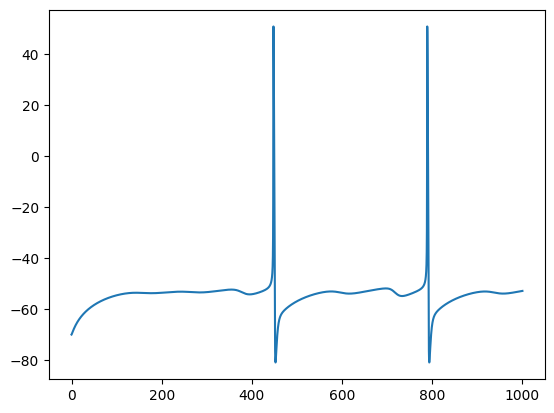

In [ ]:
t = np.arange(0,1000,0.01)

V,rs,I = simulator_HH()
#plt.xlim(20,80)
plt.plot(t,V)

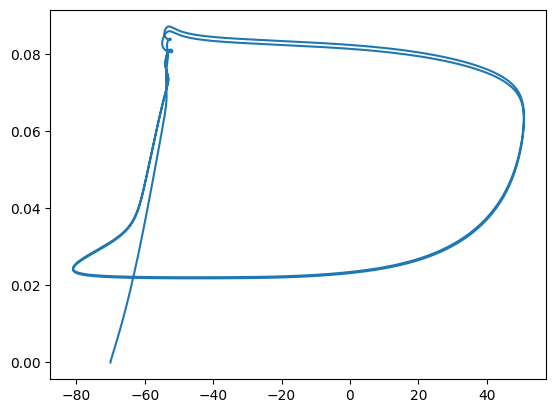

In [8]:
plt.plot(V,rs)